# Natural Language  Processing (NLP) for Text Data before Fitting to any algorithm -

Refer to  -  NLP || Dan Jurafsky || Stanford University - a higlhy reccomended site  for NLP machine learning 
https://www.youtube.com/watch?v=oWsMIW-5xUc&list=PLLssT5z_DsK8HbD2sPcUIDfQ7zmBarMYv -Natural Language Processing -- Stanford University [FULL COURSE]



In [55]:
import pandas as pd

In [42]:
df = pd.read_csv('C:/Users/Administrator/thames dm_python/th_lab final/lab 3 supetvised/naive bayes/spam_email.csv')
df.head()

,Category,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 1. Text Data Processing -Lets Perform Exploratory Data Aanalysis(EDA) so that it provides what trends/patterns  are there to differentiate between email and spam data.

## Because we know the zyst of data mining is to see the hidden trends, patterns in the dataset which wouldnt have been possible otherwise 

## Note - EDA is very imp for any data pre-processing before you directly feed into the algoeithm 

## Data Exploration for the dataset -->  to see how many "spam" and nonspam("ham") message are there in the dataset  

In [43]:
df.groupby('Category').describe()

Msg                                                               
         count unique                                                top freq
Category                                                                     
ham       4827   4518                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [44]:
df.dtypes

Category    object
Msg         object
dtype: object

# 1. Data Pre-Processing for Texts 
## 1.1 need to be done as seen from above result for columns "Category"  And Msg" as their contents are in text format 
## 2. So convert Contents of Columns "Category"  And Msg" into numbers

## Because all machine learning algorithms understand numbers not texts or other formats.

## In other words computers understand numbers not other formats


## 2.1 For Column "Category" -convert data Categorical data into numeric data

## In prevous labs  we  used the label encoding method or one hot encoding method

## lets try a very simple one as below that converts contents of Category column into numbers 

## i.e. For email/Ham message label  = 0 and Spam message label =1

# Also lets see the message length  

In [47]:
df['label'] = df.Category.map({'ham':0, 'spam':1})
df['msg_len'] = df.Msg.apply(len)
df.head(40)

,Category,Msg,label,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,157
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


# Lets look what type of texts make spam and what texts make email or ham

In [45]:
c =df.groupby('Category')
for Category,Msg in c:
    print(Category)
    print(Msg)

ham
     Category                                                Msg
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
6         ham  Even my brother is not like to speak with me. ...
...       ...                                                ...
5567      ham                                       Huh y lei...
5570      ham               Will ü b going to esplanade fr home?
5571      ham  Pity, * was in mood for that. So...any other s...
5572      ham  The guy did some bitching but I acted like i'd...
5573      ham                         Rofl. Its true to its name

[4827 rows x 2 columns]
spam
     Category                                                Msg
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
5        spam  FreeMsg Hey there darling it's been 3 wee

## An application Of EDA- Plot a histogram to see if we could find any hidden patterns to differetniate between spam and email/ham visually  

Text(0.5, 0, 'Message Length')

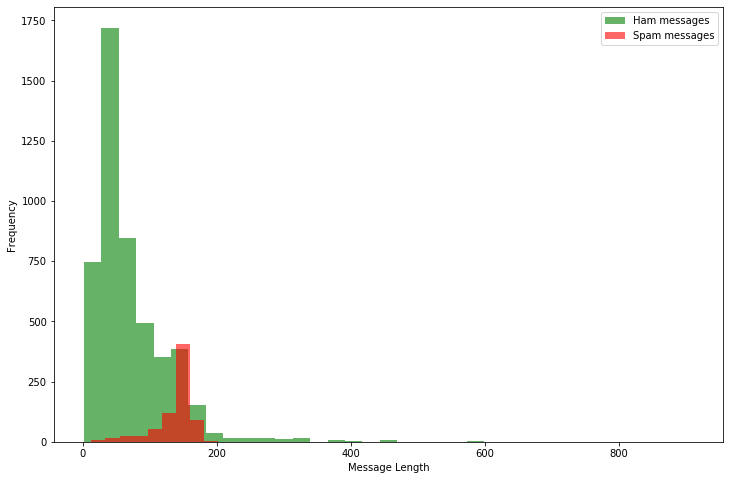

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

df[df.Category=='ham'].msg_len.plot(bins=35, kind='hist', color='green', label='Ham messages', alpha=0.6)

df[df.Category=='spam'].msg_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")

## From the above histogram plot we can see some trend -

## "Messages that are email generally have shorter word length than spam"
## A great insight from EDA that wouldn't have been possible from just looking at the dataset

# 2. Training and Testing the Dataset

##  split the overall dataset for train(80%) and test dataset(20% or 0.2)  

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.Msg, df.label, test_size =0.2)

# 3.  Text Data Processing in NLP- Using Bag Of Words(BOW) approach

## BOW  - A method of feature extraction with text data

## A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

### 1. A vocabulary of known words.
### 2. A measure of the presence of known words.

### It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.


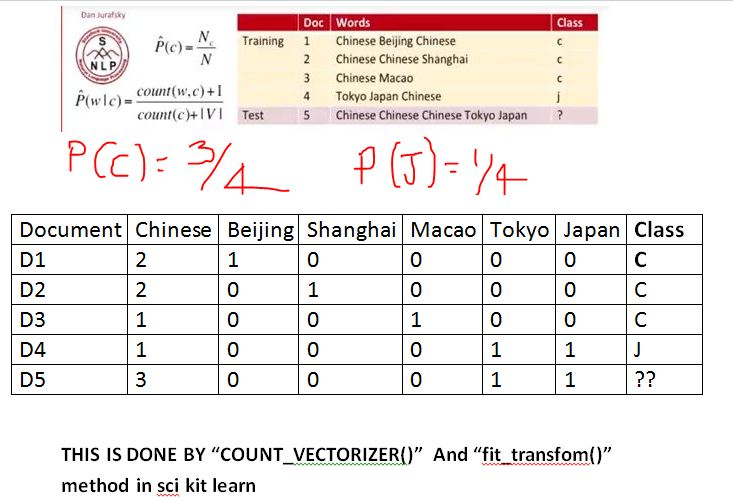

 ### This way we convert all texts in the data set to matrix representaiton as above whcih is called BOW model and the orderring of words doesnt matter. 
 
### In python scikit library it is done using Countvectorizer ( )   method

### Hence using Bag of words Model(BOW)  we Convert Text messges of Msg column into numbers 




In [50]:
from sklearn.feature_extraction.text import CountVectorizer

word_freq_count = CountVectorizer()
X_train_count = word_freq_count.fit_transform(X_train.values)

print(word_freq_count.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '0789xxxxxxx', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700621170150p', '08701213186', '08701237397', '0870

### N-grams -In how many group of words we divide the whole texts of each documents

###  Unigrams   - convert whole text into a set of elements such that each element consist of 1word in a group 

### example - "Great offer for you a big deal "   unigram = {'Great' , 'Offer', 'For', 'you', 'a', 'big', 'deal'}


### Bigrams - convert whole text into a set of elements such that each element consist of 2words in a group 
### example -   bigram = {'GreatOffer', 'OfferFor', 'For you', 'abig', 'bigdeal'}

### 3grams - convert whole text into a set of elements such that each element consist of 3words in a group
### example - "it was a great day hilarious "   

### if you look at the sentence and ask what sort of partition the words need to be done??? 

### then it depends on the goal like -if you are using a model for sentiment analysis like twitter or facebook does i.e. classify whether this text has good or bad or very good emotion then dividing  the word into 3grams makes better sense to classify our sentiment goal  than uni grams or bigrams lets see it 

###  unigram = {'It' , 'Was', 'a', 'great', 'day', 'hilarious'}
### bigram = {'It Was', 'was a', ' a great', 'great day', 'day hilarious'}
###  3grams = {'It was a', 'was a great' 'a great day' 'GREAT DAY HILARIOUS'}

### from above partions we can see 3grams partition makes more sense for twitter sentiement analysis than uni or bigram 

# But in our spam detection unigram offers better dintinction because we recognize spam or email better by single words like  'Sale',  'Discount' ,'Fine' etc etc than bigrams or 3grams 

## Moral - It totally depends on what our goal is for what sort of division we need to do for the texts. But still better   process the text into many ngram types and see what level of accuracy it gives at the result and the one that gives highest accuracy go for that partition. 
 


In [51]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# 4.  Bayes Model For SPAM FILTER DETECTION

## Bayes Theorem And Its application TO SPAM filter - Real world appplication is --> many mail systems like gmail uses it to clasify mail or spam for any message.

### Important Points  to Consider in  Naive Bayes classifier
#### 1. In The classification of Naive Bayes all model characteristics are independent. 
#### i.e. We assume that every word in the message is independent of all other words in the context of the spam filters, and we count them with the ignorance of the context.

#### 2. Then the classification algorithm generates probabilities of the message to be spam or not spam.

#### 3. The probability estimation is based on the Bayes formula, 

#### 4. and the formula components are determined on the
## basis of the word frequencies in the whole message package.

https://www.youtube.com/watch?v=j1uBHvL6Yr0 -Lecture 29 — Multinomial Naive Bayes A Worked Example — [ NLP || Dan Jurafsky || Stanford ] 

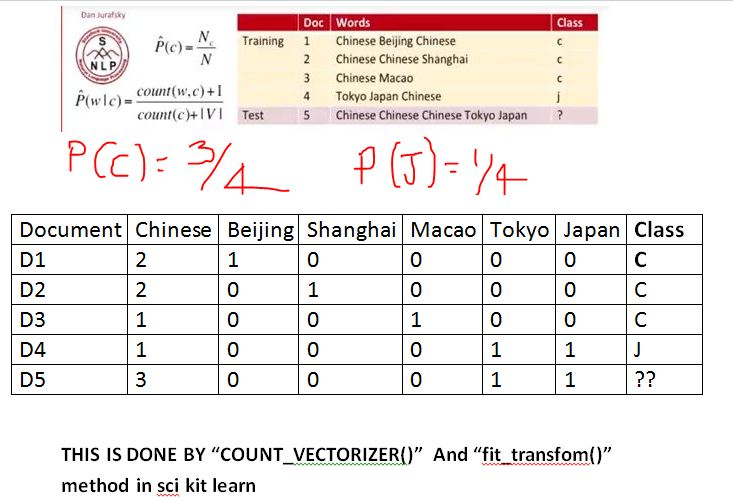

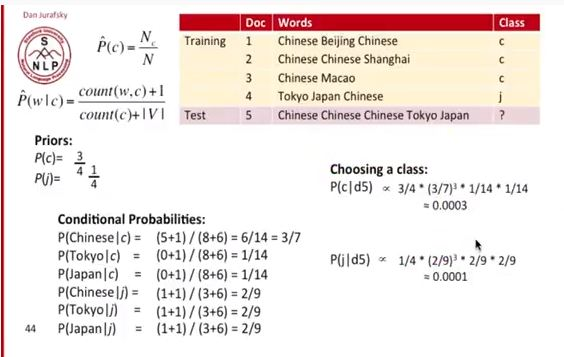  

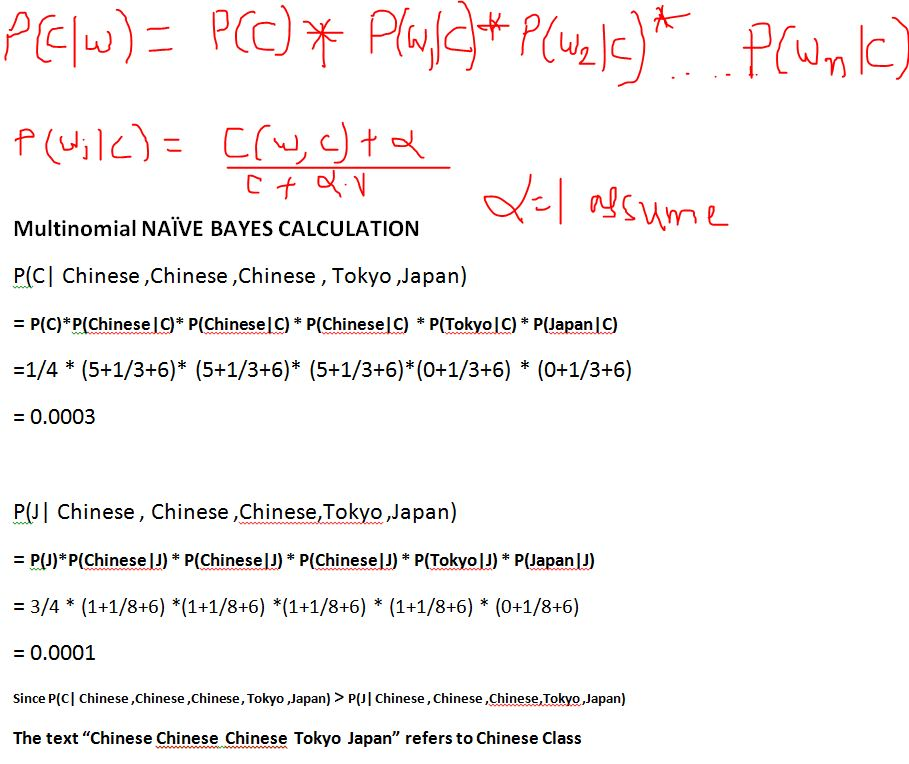



https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html 
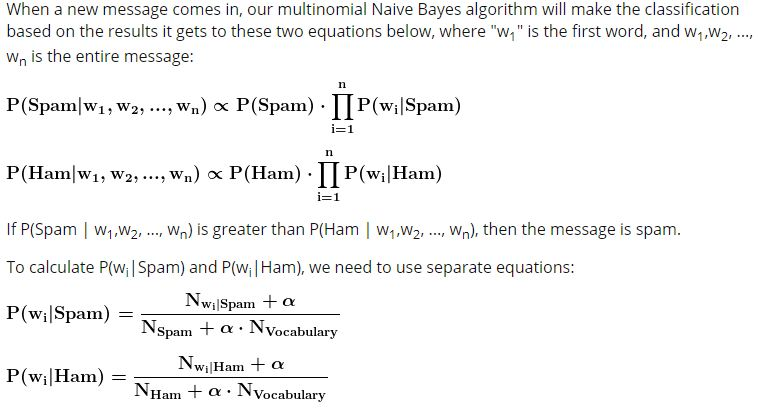

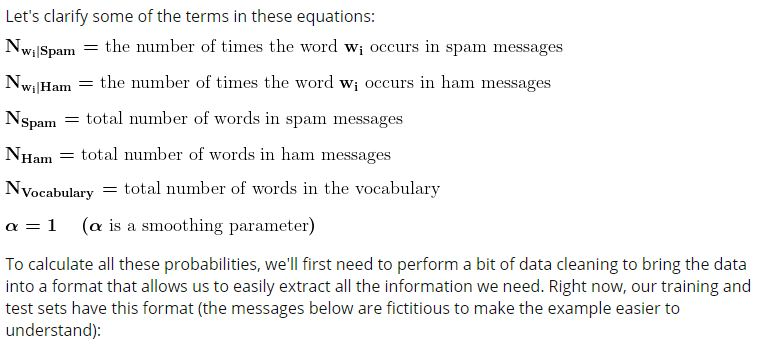

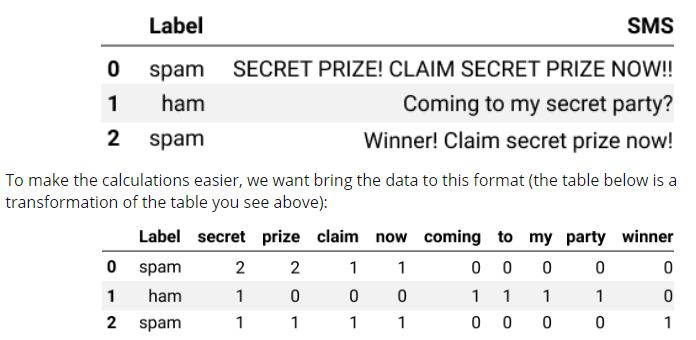

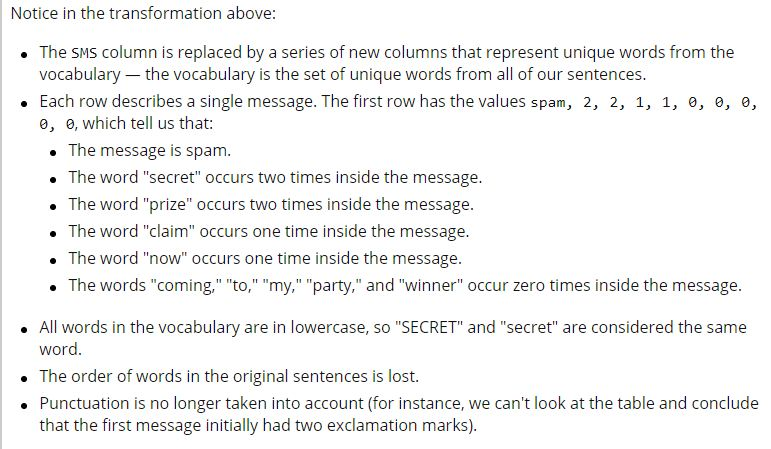


# Feed the processed data into the machine learning model -->in this case use MultinomialNaiive Bayes  for discrete data  

## using the scikit library naive_bayes function  --->   "MultinomialNB ()"

In [52]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,Y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# 5. Test it now from the trained model above by giving your own texts

In [53]:
mail_text = [ 'Get the children ready we will go to dinner', 'Congratulations you got a massive  offer']

mail = word_freq_count.transform(mail_text)
model.predict(mail)


array([0, 1], dtype=int64)

# Perform model's accuracy from the data we processed and the bayesian classifer model 

In [54]:
X_test_count = word_freq_count.transform(X_test)
model.score(X_test_count, Y_test)

0.9856502242152466